<a href="https://colab.research.google.com/github/suprimashrestha/MyModels/blob/main/Custom_CNN_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from PIL import Image
from IPython.display import display, clear_output
import io
from keras import layers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Activation,Concatenate, BatchNormalization

In [ ]:
# Set up paths to the training and testing directories
train_dir = '/content/drive/MyDrive/NAAMII /MRI/Training'
test_dir = '/content/drive/MyDrive/NAAMII /MRI/Testing'

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, val = train_test_split(train_dir, test_size=0.1,random_state=14)

In [ ]:
from tqdm import tqdm

In [ ]:
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
X_train = []
y_train = []
X_test = []
y_test = []
image_size = 224
for i in labels:
    folderPath = os.path.join("/content/drive/MyDrive/NAAMII/MRI/Training", i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join("/content/drive/MyDrive/NAAMII/MRI/Testing", i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_test.append(img)
        y_test.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

100%|██████████| 74/74 [00:49<00:00,  1.49it/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train, test_size=0.1,random_state=14)

In [ ]:
X_train = np.array(X_train) / 255.
X_val = np.array(X_val) / 255.
X_test = np.array(X_test) / 255.

In [ ]:
model = Sequential()

model.add(Conv2D(16, (3, 3), padding='same', input_shape=(image_size, image_size, 3), activation='relu')) 
model.add(BatchNormalization())

model.add(Conv2D(16, (3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(BatchNormalization()) 

model.add(Flatten()) 
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,validation_split=0.1, verbose=1, batch_size = 32, validation_data = (X_val, y_val),
                     epochs = 20)

Epoch 1/20
81/81 [==============================] - 294s 4s/step - loss: 2.3496 - accuracy: 0.6860 - val_loss: 5.1551 - val_accuracy: 0.2822
Epoch 2/20
81/81 [==============================] - 259s 3s/step - loss: 0.4465 - accuracy: 0.9048 - val_loss: 7.0839 - val_accuracy: 0.3415
Epoch 3/20
81/81 [==============================] - 259s 3s/step - loss: 0.2463 - accuracy: 0.9497 - val_loss: 5.0612 - val_accuracy: 0.4111
Epoch 4/20
81/81 [==============================] - 258s 3s/step - loss: 0.2052 - accuracy: 0.9601 - val_loss: 4.0551 - val_accuracy: 0.5261
Epoch 5/20
81/81 [==============================] - 256s 3s/step - loss: 0.1716 - accuracy: 0.9644 - val_loss: 6.3963 - val_accuracy: 0.6237
Epoch 6/20
81/81 [==============================] - 255s 3s/step - loss: 0.1186 - accuracy: 0.9748 - val_loss: 2.3290 - val_accuracy: 0.7422
Epoch 7/20
81/81 [==============================] - 255s 3s/step - loss: 0.1149 - accuracy: 0.9775 - val_loss: 2.4703 - val_accuracy: 0.7631
Epoch 8/20
81

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

13/13 [==============================] - 8s 622ms/step - loss: 14.6903 - accuracy: 0.7259
Test loss: 14.69028377532959
Test accuracy: 0.7258883118629456


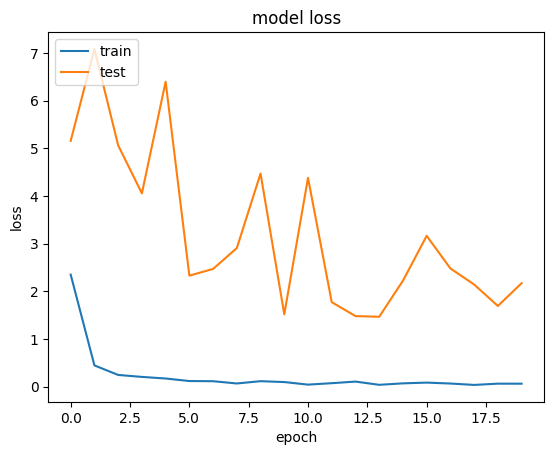

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<Figure size 640x480 with 0 Axes>

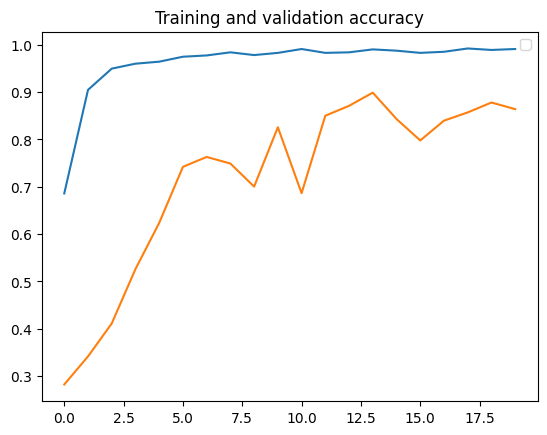

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

13/13 [==============================] - 10s 733ms/step


In [ ]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.91      0.20      0.33       100
           1       0.81      0.87      0.84       115
           2       0.57      0.95      0.72       105
           3       0.89      0.89      0.89        74

    accuracy                           0.73       394
   macro avg       0.80      0.73      0.69       394
weighted avg       0.79      0.73      0.69       394



Text(0.28, 0.92, 'MRI Confusion Matrix')

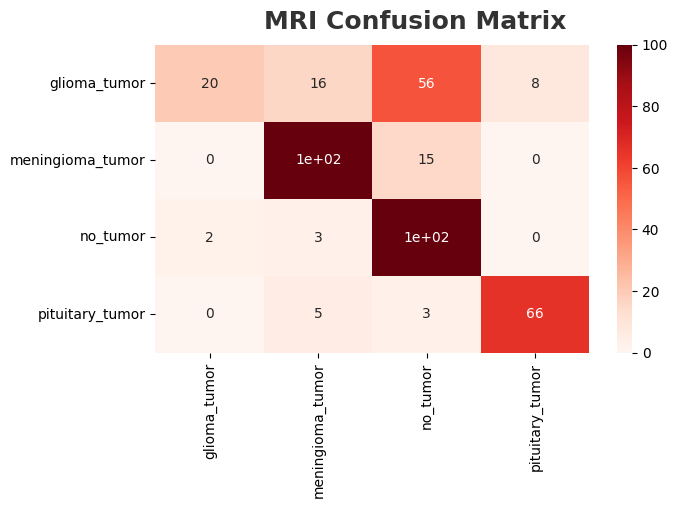

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(7,4))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,cmap=plt.cm.Reds)
fig.text(s='MRI Confusion Matrix',size=18,fontweight='bold',
            y=0.92,x=0.28,alpha=0.8)

**SIX LAYER CUSTOM MODEL WITH L2 REGULARIZATION**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(image_size, image_size, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train,validation_split=0.1, verbose=1, batch_size = 32, validation_data = (X_val, y_val),
                     epochs = 40)

Epoch 1/40
81/81 [==============================] - 1139s 14s/step - loss: 2.5669 - accuracy: 0.6969 - val_loss: 4.7113 - val_accuracy: 0.2962
Epoch 2/40
81/81 [==============================] - 1105s 14s/step - loss: 2.2415 - accuracy: 0.7766 - val_loss: 7.0107 - val_accuracy: 0.3415
Epoch 3/40
81/81 [==============================] - 1103s 14s/step - loss: 2.0348 - accuracy: 0.8177 - val_loss: 6.1566 - val_accuracy: 0.1533
Epoch 4/40
81/81 [==============================] - 1105s 14s/step - loss: 1.9367 - accuracy: 0.8238 - val_loss: 2.9404 - val_accuracy: 0.4948
Epoch 5/40
81/81 [==============================] - 1100s 14s/step - loss: 1.8364 - accuracy: 0.8513 - val_loss: 3.9264 - val_accuracy: 0.2509
Epoch 6/40
81/81 [==============================] - 1102s 14s/step - loss: 1.7770 - accuracy: 0.8513 - val_loss: 2.3587 - val_accuracy: 0.6098
Epoch 7/40
81/81 [==============================] - 1106s 14s/step - loss: 1.7997 - accuracy: 0.8556 - val_loss: 2.8156 - val_accuracy: 0.5645

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

model = Sequential()

model.add(Conv2D(16, (3, 3), padding='same', input_shape=(image_size, image_size, 3), activation='relu', kernel_regularizer=l2(0.001))) 
model.add(BatchNormalization())

model.add(Conv2D(16, (3, 3), activation='relu', kernel_regularizer=l2(0.001))) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(8, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization()) 

model.add(Conv2D(4, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(BatchNormalization())
model.add(Dropout(0.25)) 

model.add(Flatten()) 
model.add(Dropout(0.5)) 
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001))) 
model.add(BatchNormalization())
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
num_classes = 4

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 16)     64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 222, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 111, 111, 16)     64        
 hNormalization)                                                 
                                                        

In [ ]:
model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

**SIX LAYER CUSTOM MODEL WITH 93 % VALIDATION ACCURACY**

In [ ]:
history = model.fit(X_train, y_train,validation_split=0.1, verbose=1, batch_size = 32, validation_data = (X_val, y_val),
                     epochs = 20)

Epoch 1/20
81/81 [==============================] - 295s 4s/step - loss: 1.0646 - accuracy: 0.6016 - val_loss: 1.7312 - val_accuracy: 0.2195
Epoch 2/20
81/81 [==============================] - 281s 3s/step - loss: 0.7709 - accuracy: 0.7507 - val_loss: 1.5819 - val_accuracy: 0.4042
Epoch 3/20
81/81 [==============================] - 300s 4s/step - loss: 0.6519 - accuracy: 0.8045 - val_loss: 1.5165 - val_accuracy: 0.2787
Epoch 4/20
81/81 [==============================] - 293s 4s/step - loss: 0.5485 - accuracy: 0.8401 - val_loss: 1.5487 - val_accuracy: 0.3624
Epoch 5/20
81/81 [==============================] - 289s 4s/step - loss: 0.4681 - accuracy: 0.8711 - val_loss: 1.5186 - val_accuracy: 0.3659
Epoch 6/20
81/81 [==============================] - 288s 4s/step - loss: 0.4088 - accuracy: 0.8974 - val_loss: 1.5320 - val_accuracy: 0.5679
Epoch 7/20
81/81 [==============================] - 290s 4s/step - loss: 0.3536 - accuracy: 0.9094 - val_loss: 0.4935 - val_accuracy: 0.8780
Epoch 8/20
81

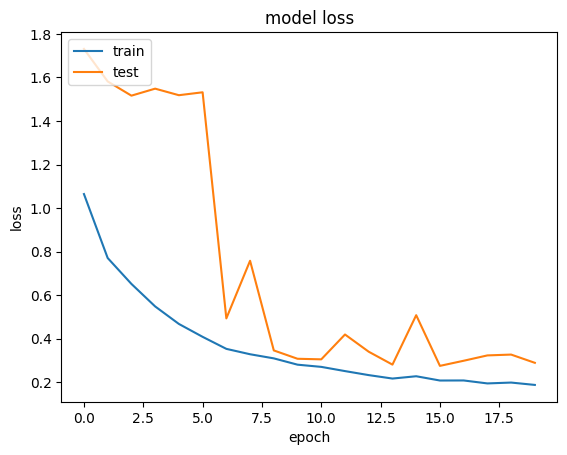

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<Figure size 640x480 with 0 Axes>

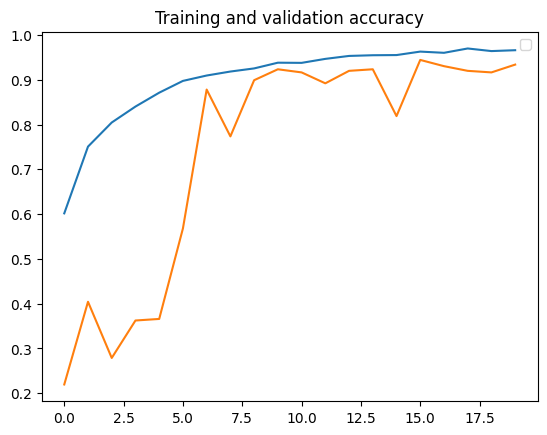

<Figure size 640x480 with 0 Axes>

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

13/13 [==============================] - 11s 819ms/step


In [ ]:
model.evaluate(X_train, y_train)

81/81 [==============================] - 69s 841ms/step - loss: 0.1252 - accuracy: 0.9942


[0.12523852288722992, 0.9941927790641785]

In [ ]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       1.00      0.19      0.32       100
           1       0.82      0.85      0.84       115
           2       0.53      1.00      0.69       105
           3       0.93      0.70      0.80        74

    accuracy                           0.70       394
   macro avg       0.82      0.69      0.66       394
weighted avg       0.81      0.70      0.66       394



Text(0.28, 0.92, 'MRI Confusion Matrix')

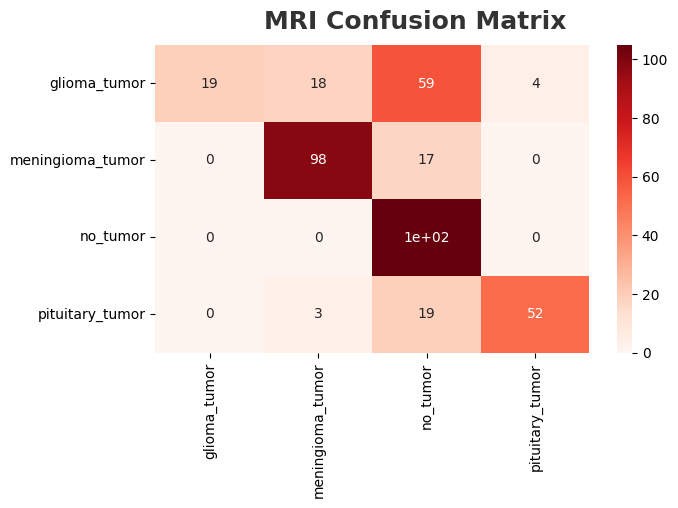

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(7,4))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,cmap=plt.cm.Reds)
fig.text(s='MRI Confusion Matrix',size=18,fontweight='bold',
            y=0.92,x=0.28,alpha=0.8)

**SECOND MODEL WITH HYPERPARAMETER TUNING WITH 50 EPOCHS RUNNING AND VALIDATION SPLIT 0.2 WITH VALIDATION ACCURACY 84 %**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define hyperparameters
image_size = 224
learning_rate = 0.01
batch_size = 32
epochs = 50
validation_split = 0.2

# Define the model
model = Sequential()

model.add(Conv2D(16, (3, 3), padding='same', input_shape=(image_size, image_size, 3), activation='relu', kernel_regularizer=l2(0.001))) 
model.add(BatchNormalization())

model.add(Conv2D(16, (3, 3), activation='relu', kernel_regularizer=l2(0.001))) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(8, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization()) 

model.add(Conv2D(4, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(BatchNormalization())
model.add(Dropout(0.25)) 

model.add(Flatten()) 
model.add(Dropout(0.5)) 
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001))) 
model.add(BatchNormalization())
model.add(Dense(4, activation='softmax'))

# Define the optimizer
optimizer = Adam(learning_rate=learning_rate)

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks for early stopping and model checkpointing
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)
checkpoint = ModelCheckpoint('model.h5', monitor='val_loss', save_best_only=True, verbose=1)




In [ ]:
# Train the model
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=validation_split, callbacks=[early_stopping, checkpoint])


Epoch 1/50
65/65 [==============================] - ETA: 0s - loss: 1.2348 - accuracy: 0.6200
Epoch 1: val_loss improved from inf to 1.37204, saving model to model.h5
65/65 [==============================] - 261s 4s/step - loss: 1.2348 - accuracy: 0.6200 - val_loss: 1.3720 - val_accuracy: 0.6054
Epoch 2/50
65/65 [==============================] - ETA: 0s - loss: 0.9244 - accuracy: 0.7599
Epoch 2: val_loss did not improve from 1.37204
65/65 [==============================] - 245s 4s/step - loss: 0.9244 - accuracy: 0.7599 - val_loss: 1.6474 - val_accuracy: 0.5261
Epoch 3/50
65/65 [==============================] - ETA: 0s - loss: 0.8257 - accuracy: 0.8074
Epoch 3: val_loss did not improve from 1.37204
65/65 [==============================] - 237s 4s/step - loss: 0.8257 - accuracy: 0.8074 - val_loss: 2.2342 - val_accuracy: 0.4352
Epoch 4/50
65/65 [==============================] - ETA: 0s - loss: 0.8682 - accuracy: 0.8369
Epoch 4: val_loss improved from 1.37204 to 1.12096, saving model to

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

13/13 [==============================] - 10s 799ms/step - loss: 2.5168 - accuracy: 0.5051
Test loss: 2.516782283782959
Test accuracy: 0.5050761699676514


In [ ]:
model.evaluate(X_train, y_train)

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(7,4))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,cmap=plt.cm.Reds)
fig.text(s='MRI Confusion Matrix',size=18,fontweight='bold',
            y=0.92,x=0.28,alpha=0.8)

**3rd MODEL WITH VALIDATION SPLIT 0.1 AND EPOCHS 30**


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define hyperparameters
image_size = 224
learning_rate = 0.001
batch_size = 32
epochs = 30
validation_split = 0.1

# Define the model
model = Sequential()

model.add(Conv2D(16, (3, 3), padding='same', input_shape=(image_size, image_size, 3), activation='relu', kernel_regularizer=l2(0.001))) 
model.add(BatchNormalization())

model.add(Conv2D(16, (3, 3), activation='relu', kernel_regularizer=l2(0.001))) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(8, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization()) 

model.add(Conv2D(4, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(BatchNormalization())
model.add(Dropout(0.25)) 

model.add(Flatten()) 
model.add(Dropout(0.5)) 
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001))) 
model.add(BatchNormalization())
model.add(Dense(4, activation='softmax'))

# Define the optimizer
optimizer = Adam(learning_rate=learning_rate)

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks for early stopping and model checkpointing
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)
checkpoint = ModelCheckpoint('model.h5', monitor='val_loss', save_best_only=True, verbose=1)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=validation_split, callbacks=[early_stopping, checkpoint])

Epoch 1/50
73/73 [==============================] - ETA: 0s - loss: 1.0055 - accuracy: 0.6205
Epoch 1: val_loss improved from inf to 1.95736, saving model to model.h5
73/73 [==============================] - 249s 3s/step - loss: 1.0055 - accuracy: 0.6205 - val_loss: 1.9574 - val_accuracy: 0.2973
Epoch 2/50
73/73 [==============================] - ETA: 0s - loss: 0.6666 - accuracy: 0.7793
Epoch 2: val_loss did not improve from 1.95736
73/73 [==============================] - 240s 3s/step - loss: 0.6666 - accuracy: 0.7793 - val_loss: 2.1294 - val_accuracy: 0.2973
Epoch 3/50
73/73 [==============================] - ETA: 0s - loss: 0.5571 - accuracy: 0.8231
Epoch 3: val_loss improved from 1.95736 to 1.54568, saving model to model.h5
73/73 [==============================] - 245s 3s/step - loss: 0.5571 - accuracy: 0.8231 - val_loss: 1.5457 - val_accuracy: 0.3127
Epoch 4/50
73/73 [==============================] - ETA: 0s - loss: 0.4731 - accuracy: 0.8653
Epoch 4: val_loss improved from 1.545

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

13/13 [==============================] - 13s 863ms/step - loss: 1.8508 - accuracy: 0.6929
Test loss: 1.850795030593872
Test accuracy: 0.692893385887146


In [ ]:

import matplotlib.pyplot as plt